<div style='text-align: center;'>
<img src="images/math60082-banner.png" alt="image" width="80%" height="auto">
</div>

# Lab Class - Week 9

## Department of Mathematics

Last time we demonstrated the explicit finite difference method
- We showed how accurate it can be,
- how timestep restrictions make it inefficient,
- and how interpolation can maintain accuracy inbetween grid points.
- This time we cover the Crank-Nicolson Method.

## Crank-Nicolson Method
The algorithm now known as the [Crank-Nicolson method]() was develped by John Crank and Phyllis Nicolson at the University of Manchester during the 2nd World War. It later formed the third part of Nicolson's PhD thesis [*Three Problems in Theoretical Physics*](https://www.librarysearch.manchester.ac.uk/permalink/44MAN_INST/1r887gn/alma992979302376401631) and was 
[published](https://doi.org/10.1017%2FS0305004100023197) in 1947.
<p float="left">
    <img src="images/JohnCrank.jpg" alt="John Crank" width="40%" height="auto">
    <img src="images/PhyllisNicolson.jpg" alt="Phyllis Nicolson" width="40%" height="auto">
</p>



As introduced at the end of the last lecture the Crank-Nicolson scheme 
works by evaluating the derivatives at $V(S, t + \Delta t/2)$.
The main advantages of this is that the error in the time derivative is 
now $(\Delta t)^2$ rather than $\Delta t$ and that there are no 
stability constraints.
The only problem with using the Crank-Nicolson method rather than the explicit method is that we will need to use three option 
values in the future $(t+\Delta t)$ to calculate three option values not $(t)$. This will make the scheme slightly  harder.

# Task

- Use finite difference to generate $O((\Delta S)^2,(\Delta t)^2)$ approximations to the derivatives in the BS PDE.


Take a Taylor series expansion wrt $t$ around the point $(S,t+1/2\Delta t)$, we have
$$	V(S,t)=V(S,t+1/2\Delta t)-\tfrac12\Delta t\frac{\partial V}{\partial t}
	+\tfrac18 (\Delta t)^2\frac{\partial ^2V}{\partial t^2} +O((\Delta t)^3) 
	\tag{*}
$$
and
$$
V(S,t+\Delta t)=V(S,t+1/2\Delta t)+\tfrac12\Delta t\frac{\partial V}{\partial t}
+\tfrac18 (\Delta t)^2\frac{\partial ^2V}{\partial t^2} +O((\Delta t)^3) .
\tag{**}
$$
Subtracting (*) away from (**) and dividing by $\Delta t$ we are left with
$$
\frac{V(S,t+\Delta t)-V(S,t)}{\Delta t} = \frac{\partial V}{\partial t}
 +O((\Delta t)^2) .
$$

So how do we find $\frac{\partial V}{\partial S}$ at $(S,t+1/2\Delta t)$ if there is not any grid points at that time level?
Next consider 
$$\frac{\partial V}{\partial S}(S,t)=\frac{V(S+\Delta S,t)-V(S-\Delta S,t)}{2\Delta S}+O((\Delta S)^2)$$
and 
$$\frac{\partial V}{\partial S}(S,t+\Delta t)=\frac{V(S+\Delta S,t+\Delta t)-V(S-\Delta S,t+\Delta t)}{2\Delta S}+O((\Delta S)^2)$$
so
$$\frac{\partial V}{\partial S}(S,t+1/2\Delta t)=\frac{V(S+\Delta S,t)-V(S-\Delta S,t)+V(S+\Delta S,t+\Delta t)-V(S-\Delta S,t+\Delta t)}{4\Delta S}+O((\Delta S)^2,(\Delta t)^2)$$
is a second order approximation at $(S,t+1/2\Delta t)$. We can do similar for $\frac{\partial^2 V}{\partial S^2}$, and even for example the term
$$
 - r V(S,t+1/2\Delta t)= -r \tfrac12 \big(V(S,t) + V(S,t+\Delta t) \big) +O((\Delta t)^2)
$$
must be approximated at the half time step.


# Crank-Nicolson Scheme

From our new approximations, in terms of $V^i_j$ we have
$$\frac{\partial V}{\partial t}\approx \frac{V_j^{i+1}-V_j^i}{\Delta t}$$
$$\frac{\partial V}{\partial S}\approx \frac{1}{4\Delta S}(V^i_{j+1}-
V^i_{j-1}+V_{j+1}^{i+1}-
V_{j-1}^{i+1})$$
$$\frac{\partial^2 V}{\partial S^2}\approx \frac{1}{2\Delta S^2}(V^i_{j+1}-2V_j^i
+V^i_{j-1}+V_{j+1}^{i+1}-2V_j^{i+1}
+V_{j-1}^{i+1})$$
$$V\approx \frac{1}{2}(V^i_{j}+V_{j}^{i+1})$$
Substituting these approximations into the BS PDE, and given that here the $V^i$ values are all unknown, we rearrange our equations to have the known values on one side and the 
unknown values on the other.
$$
  \tfrac14(\sigma^2j^2-rj)V_{j-1}^i
+(-\frac{\sigma^2j^2}{2}-\frac{r}{2}
-\frac{1}{\Delta t})V_j^i
+\tfrac14(\sigma^2j^2+rj)
V_{j+1}^i=d_j$$
where
$$
d_=-\tfrac14(\sigma^2j^2-rj)V_{j-1}^{i+1}-(-\frac{\sigma^2j^2}{2}
-\frac{r}{2}+\frac{1}{\Delta t})
V_j^{i+1}-\frac14(\sigma^2j^2+rj)V_{j+1}^{i+1}
$$

# Linear Algebra Problem


We can rewrite the valuation problem in terms of a matrix as follows:
$$\begin{pmatrix}
b_0&c_0&0&0&.&.&.&.&0\\
a_1&b_1&c_1&0&.&.&.&.&.\\
0&a_2&b_2&c_2&0&.&.&.&.\\
.&.&a_3&b_3&c_3&.&.&.&.\\
.&.&.&.&.&.&.&.&.\\
.&.&.&.&a_j&b_j&c_j&.&.\\
.&.&.&.&.&.&.&.&.\\
0&.&.&.&.&.&.&a_{jMax}&b_{jMax}
\end{pmatrix}
\begin{pmatrix}
V_0^i\\V_1^i\\V_2^i\\V_3^i\\.\\.\\V_{jMax-1}^i\\V_{jMax}^i
\end{pmatrix}
=\begin{pmatrix}
d_0^i\\d_1^i\\d_2^i\\d_3^i\\.\\.\\d_{jMax-1}^i\\d_{jMax}^i
\end{pmatrix}
$$
where for $1\leq j <jMax$ we have:
$$a_j=\tfrac14(\sigma^2j^2-rj)$$
$$b_j=-\frac{\sigma^2j^2}{2}-\frac{r}{2}-\frac{1}{\Delta t}$$
$$c_j=\tfrac14(\sigma^2j^2+rj)$$
$$d_j=-\tfrac14(\sigma^2j^2-rj)V_{j-1}^{i+1}-(-\frac{\sigma^2j^2}{2}-\frac{r}{2}+\frac{1}{\Delta
t})V_j^{i+1}-\tfrac14(\sigma^2j^2+rj)V_{j+1}^{i+1}
$$
For $j=0$ and $j=jMax$, we will need to use the boundary conditions of the problem.

First consider the payoff at expiry $t=T$, we have $V(S,T)= \max(X-S,0)$ so this can be written
$$
V_j^{iMax} = \max(X - S_j , 0).
$$
For put option, at $S=0$, we have $V_0^i = X e^{-r(T-i\Delta t)}$ so to convert into matrix form we write
$$
b_0 V_0^i +c_0 V_1^i = d_0
$$
and therefore $b_0=1$, $c_0=0$ and $d_0=Xe^{-r(T-i\Delta t)}$.

Now at upper boundary $V_{jMax}^i = 0$ so we write 
$$
a_{jMax} V_{jMax-1}^i +b_{jMax} V_{jMax}^i = d_{jMax}
$$
and therefore $a_{jMax}=0$, $b_{jMax}=1$ and $d_{jMax}=0$.


# Matrix Form

The matrix problem to solve is therefore
$$
A \boldsymbol{V^i} = \boldsymbol{d^{i+1}}
$$
where $\boldsymbol{d^{i+1}}$ depends on the value function $V$ at $t+\Delta t$.
Note that this matrix is extremely sparse &mdash; there are only 3 non zero diagonals.

In [1]:
# Begin by loading libraries that we'll need
import scipy
import numpy as np
import matplotlib.pyplot as plt

from math import exp

In [2]:
# Set the parameters
sigma = 0.4
r = 0.05
X = 2
T = 1

# Choose the number of steps in t and S
iMax = 4 # steps in time
jMax = 4 # steps in asset value

In [3]:
# Fix the value of S on the upper boundary,
# then calculate the step sizes.
SmaxFactor = 2.0
Smax = SmaxFactor * X

dS = Smax / jMax
dt = T / iMax

# Set up storage for the results
S = np.zeros(jMax+1)
t = np.zeros(iMax+1)
vNew = np.zeros(jMax+1)
vOld = np.zeros(jMax+1)

# Calculate the values of S_j and t^i 
for i in range(iMax+1):
    t[i] = i*dt

for j in range(jMax+1):
    S[j] = j*dS

# Record the value of the option at expiry
for j in range(jMax+1):
    vOld[j] = max( X - S[j] , 0.0 )

# Tasks

- setup the matrix problem
- solve the matrix using a sparse solver

Our matrix is very sparse, with entries on the main diagonal and on the diagonals immediately above and below the main diagonal, but nowhere else. This means that we can use  SciPy's `solve_banded()` function to solve $A \boldsymbol{V^i} = \boldsymbol{d^{i+1}}$.

See the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_banded.html#scipy.linalg.solve_banded) for more details.

In [4]:
from scipy.linalg import solve_banded

We'll store $A$'s diagonal bands in a $3 \times \mbox{(\texttt{jMax + 1})}$ matrix `A_bands` in such a way that:

* `A_bands[2,j-1]` $= a_{j}$
* `A_bands[1,j]` $= b_j$
* `A_bands[0,j+1]` $= c_j$

This storage pattern is expected by `solve_banded()`, whose documentation says that one should construct a matrix `ab` whose relation to the full matrix `a` is 
```
ab[u + i - j, j] = a[i,j]
```
where `u` is the number of non-empty diagonals above the main one and `l` is the number of non-empty diagonals under the main one: for us, `u = l = 1`.

In [5]:
# Set up storage for the tri-diagonal matrix A
A_bands = np.zeros(shape=(3,jMax+1)) 

# Set up a tuple that described the bands in our matrix
u=1 # number of bands above the main disgonal
l=1 # number of bands below the main disgonal
l_and_u = (l, u) # needed for solve_banded()

# Enforce the boundary condition at S=0
# b_0 V_0 + c_0 V_1 = d_0
A_bands[1,0] = 1.0 # b_0 = 1
A_bands[0,1] = 0.0 # c_0 = 0

# Set a[j], b[j] and c[j] for the middle rows
for j in range(1,jMax):
    # a_j V_j-1 + b_j V_j + c_i V_j+1 = d_i
    A_bands[2,j-1] = 0.25*(sigma*sigma*j*j - r*j) # a_j
    A_bands[1,j] = -1./dt - 0.5*sigma*sigma*j*j - 0.5*r # b_j
    A_bands[0,j+1] = 0.25*(sigma*sigma*j*j + r*j) # c_j
    
# Use the boundary condition at S = Smax
# a_jMax V_jMax-1 + b_jMax V_jMax = d_jMax
A_bands[2,jMax-1] = 0.0 # a_jMax = 0
A_bands[1,jMax] = 1.0 # b_jMax = 1

# print banded matrix
print(A_bands)

[[ 0.      0.      0.0525  0.185   0.3975]
 [ 1.     -4.105  -4.345  -4.745   1.    ]
 [ 0.0275  0.135   0.3225  0.      0.    ]]


In [6]:
# Allocate storage for the righthand side of the equation Av = d
d = np.zeros(jMax+1) 
for i in range(iMax-1,-1,-1):
    # Fill d with values depending on V^{i+1}
    d[0] = X*exp(-r*(T-t[i])) # Boundary condition at S=0.
    for j in range(1,jMax):
        aa = A_bands[2,j-1] # a_j
        bb = A_bands[1,j] + 2.0/dt # b_j + 2./dt
        cc = A_bands[0,j+1] # c_j
        d[j] = - aa*vOld[j-1] - bb*vOld[j] - cc*vOld[j+1]
        
    d[jMax] = 0.0 # Boundary condtion at S= Smax

    # Solve the equation
    vNew = solve_banded(l_and_u,A_bands,d)
    
    vOld = np.copy(vNew)

In [7]:
vNew

array([1.90245885, 0.9176262 , 0.19123343, 0.04296388, 0.        ])

# Tasks:
    
- Try different values of `iMax` and `jMax` &mdash; what do you notice?
- Put your algorithm in a function, and return the solution:
    - Parameters: `sigma`, `r`, `X`, `T`, `iMax`, `jMax`
    - return: `vNew`, `S`
- Try plotting the solution $V(S,t=0)$ against $S$ for different values of `iMax` and `jMax`

In [8]:
# Bundle up the solver as a function 
def EuroPutCN( iMax, jMax, X, T, r, sigma, SmaxFactor=2.0 ):
    # Fix the value of S on the upper boundary,
    # then calculate the step sizes.
    Smax = SmaxFactor * X
    
    dS = Smax / jMax
    dt = T / iMax
    
    # Set up storage for the results
    S = np.zeros(jMax+1)
    t = np.zeros(iMax+1)
    vNew = np.zeros(jMax+1)
    vOld = np.zeros(jMax+1)
    
    # Calculate the values of S_j and t^i 
    t = np.array([i*dt for i in range(iMax+1)])
    S = np.array([j*dS for j in range(jMax+1)])
    
    # Record the value of the option at expiry
    vOld = np.array([max(X - S[j], 0.0) for j in range(jMax+1)])

    # Set up storage for the tri-diagonal matrix A
    # A[0,j] will be 
    A_bands = np.zeros(shape=(3,jMax+1)) 
    
    # Set up a tuple that described the bands in our matrix
    u=1 # number of bands above the main disgonal
    l=1 # number of bands below the main disgonal
    l_and_u = (l, u) # needed for solve_banded()
    
    # Enforce the boundary condition at S=0
    # b_0 V_0 + c_0 V_1 = d_0
    A_bands[1,0] = 1.0 # b_0 = 1
    A_bands[0,1] = 0.0 # c_0 = 0
    
    # Set a[j], b[j] and c[j] for the middle rows
    for j in range(1,jMax):
        # a_j V_j-1 + b_j V_j + c_i V_j+1 = d_i
        A_bands[2,j-1] = 0.25*(sigma*sigma*j*j - r*j) # a_j
        A_bands[1,j] = -1./dt - 0.5*sigma*sigma*j*j - 0.5*r # b_j
        A_bands[0,j+1] = 0.25*(sigma*sigma*j*j + r*j) # c_j
        
    # Enforce the boundary condition at S = Smax
    # a_jMax V_jMax-1 + b_jMax V_jMax = d_jMax
    A_bands[2,jMax-1] = 0.0 # a_jMax = 0
    A_bands[1,jMax] = 1.0 # b_jMax = 1

    # Allocate storage for the righthand side of the equation Av = d
    d = np.zeros(jMax+1) 

    # Step backwards through time
    for i in range(iMax-1,-1,-1):
        # Fill d with values depending on V^{i+1}
        d[0] = X*np.exp(-r*(T-t[i])) # Bouindary condition at S=0.
        for j in range(1,jMax):
            aa = A_bands[2,j-1] # a_j
            bb = A_bands[1,j] + 2.0/dt # b_j + 2./dt
            cc = A_bands[0,j+1] # c_j
            d[j] = - aa*vOld[j-1] - bb*vOld[j] - cc*vOld[j+1]
            
        d[jMax] = 0.0 # Boundary condtion at S=Smax
    
        # Solve the equation
        vNew = solve_banded(l_and_u,A_bands,d)

        # Move on to the next step
        vOld = np.copy(vNew)

    # Return the results
    return S, vNew

# Check that it produces the same results as above
iMax = 4
jMax = 4
S, cnV = EuroPutCN( iMax, jMax, X, T, r, sigma )
vNew - cnV # Should be all zeros

array([0., 0., 0., 0., 0.])

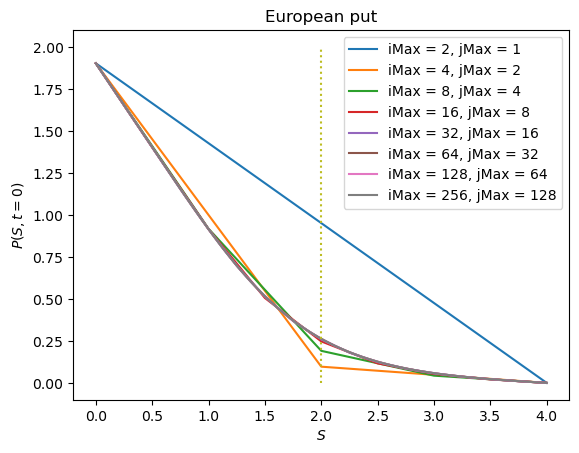

In [9]:
# We'll crank up the number of time steps and space steps, plotting the results.
N = [int(pow(2,j)) for j in range(8)]
for j in range(len(N)):
    iMax = 2 * N[j]
    jMax = N[j]
    S, V = EuroPutCN( iMax, jMax, X, T, r, sigma )
    plt.plot( S, V, label=f'iMax = {iMax}, jMax = {jMax}' )

plt.plot( [X, X], [0, X], linestyle="dotted" ) # Dotted vertical line at strike price
plt.xlabel( "$S$" )
plt.ylabel( "$P(S, t=0)$" )
plt.title( "European put" )
plt.legend()

# Stability and Convergence of the Scheme

Crank-Nicolson is stable (although prone to *ringing*) and second order convergent.


# Tasks


- derive the truncation errors of the scheme
- by choosing different values of $\Delta t$ and $\Delta S$, verify the convergence rate of the method
- analyse the errors, comparing with the analytic solution 
- try interpolation techniques to get the values inbetween the grid points.
- use `numba` to speed up your code

### Analytic solution
For a European put we have:
$$
    P(S,t) = X e^{-r(T-t)} N(-d_2) - SN(-d_1)
$$
where $N$ is the cumulative distribution function of the standard normal,
$$
    N(x) = \frac{1}{\sqrt{2\pi}} \, \int_{-\infty}^x e^{-s^2/2} \, ds,
$$
and the $d_j$ are given by
$$
\begin{align}
    d_1 &= \frac{\log(S/X) + (r + \sigma^2/2)(T-t)}{\sigma \sqrt{T-t}} \\
    d_2 &= \frac{\log(S/X) + (r - \sigma^2/2)(T-t)}{\sigma \sqrt{T-t}}
\end{align}
$$

In [10]:
from scipy.stats import norm
from math import log, exp, sqrt

# Compute the exact solution
def EuroPut_exact( S, t, X, T, r, sigma ):
    if S == 0:
        val = X * exp( -r*(T - t) )
    else: # S > 0
        d1 = log(S/X) + (r + 0.5*sigma*sigma)*(T - t)
        d1 *= 1.0 /(sigma * sqrt(T - t))
        
        d2 = log(S/X) + (r - 0.5*sigma*sigma)*(T - t)
        d2 *= 1.0 /(sigma * sqrt(T - t))
    
        val = X * exp( -r*(T - t) ) * norm.cdf(-d2) - S * norm.cdf(-d1)
        
    return val

In [11]:
# Solve with Crank-Nicolson, then plot that and the true solution
iMax = 128
jMax = 128
S, cnV = EuroPutCN( iMax, jMax, X, T, r, sigma, 4.0 ) # Use S_U = 4*X
trueV = np.array( [EuroPut_exact(s, 0.0, X, T, r, sigma ) for s in S] )

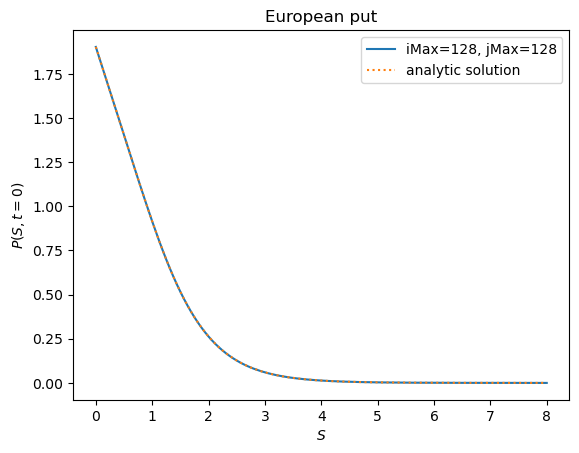

In [12]:
plt.plot( S, cnV, label=f'iMax={iMax}, jMax={jMax}' )
plt.plot( S, trueV, linestyle="dotted", label='analytic solution' )
plt.xlabel( '$S$' ) 
plt.ylabel( '$P(S, t=0)$' ) 
plt.title( "European put" )
plt.legend()

### Investigating convergence
As in Week 8, we try a range of steps sizes in $t$ and $S$ and see how the error decreases. We'll measure error with a discrete approximation to
$$
   D = \left[ \frac{1}{S_u} \,\int_0^{S_u} \left( P(S,0) - P_{FD}(S,0) \right)^2 \, dS \right]^{1/2}
$$
where $P(S,0)$ is the analytic solution and $P_{FD}(S,0)$ is the finite-difference approximation. The quantity is sometimes called the &ldquo;root-mean-square&rdquo; difference (or RMS difference, for short) between $P(S,0)$ and $P_{FD}(S,0)$.

To understand the code below, consider a trapezoidal rule approximation to an integral like the one above:
$$
   \frac{1}{S_u} \,\int_0^{S_u} f(S)\, dS 
   \; \approx \; \frac{1}{S_u} \,\sum_{j=0}^{J - 1} \frac{\Delta S}{2} \left( f(S_j) + f(S_{j+1}) \right)
$$
where $J = $ `jMax` is the number of steps, so $\Delta S = S_u / J$. Thus
$$
\begin{align}
   \frac{1}{S_u} \, \int_0^{S_u} f(S) \, dS 
        & \approx \frac{1}{S_u} \, \frac{\Delta S}{2}  \sum_{j=0}^{J - 1} \left( f(S_j) + f(S_{j+1}) \right) \\
        & \approx \frac{1}{S_u} \, \frac{S_u}{2 J} \left( \sum_{j=0}^{J - 1} f(S_j) + \sum_{j=0}^{J - 1}f(S_{j+1}) \right) \\
        & \approx \frac{1}{2J} \, \left( \sum_{j=0}^{J - 1} f(S_j) + \sum_{k=1}^{J}f(S_{k}) \right) \\
\end{align}
$$
Most terms of the form $f(S_j)$ appear in both sums, but $f(S_0)$ appears only in the first one, while $f(S_J)$ appears only in the second one. Thus we can write
$$
    \frac{1}{S_u} \, \int_0^{S_u} f(S) \, dS \; \approx \; \frac{1}{J} \sum_{j=0}^J f(S_j) - \frac{1}{2J} \left( f(S_0) + f(S_j)\right).
$$
If we neglect the corrections for $f(S_0)$ and $f(S_J)$, we get the approximation implemented below
$$
    D \approx \left[ \frac{1}{J} \sum_{j=0}^{J} \left( P(S_j,0) - P_{FD}(S_j,0) \right)^2 \right]^{1/2}
$$


In [13]:
# Define a function to compute our measure of error
def rmsError( fdV, trueV ):
    err = fdV - trueV
    return( sqrt(np.mean(err*err)) )

# Apply it to a range of sizes
ijMaxVals = np.array( [int(pow(2,j)) for j in range(4,11)], dtype=np.uint )
numVals = len(ijMaxVals)
rmsErrorVals = np.zeros(numVals)
for i in range(numVals):
    jMax = int(ijMaxVals[i])
    iMax = 2048
    S, cnV = EuroPutCN( iMax, jMax, X, T, r, sigma, 8.0 )
    trueV = np.array( [EuroPut_exact(s, 0.0, X, T, r, sigma ) for s in S] )
    rmsErrorVals[i] = rmsError( cnV, trueV )
    print( f'iMax = {iMax}, jMax = {jMax}, D = {rmsErrorVals[i]}' ) 

iMax = 2048, jMax = 16, D = 0.017792850743957197
iMax = 2048, jMax = 32, D = 0.0038683565505200114
iMax = 2048, jMax = 64, D = 0.0009498303438350022
iMax = 2048, jMax = 128, D = 0.0002370008533437693
iMax = 2048, jMax = 256, D = 5.9280817286425855e-05
iMax = 2048, jMax = 512, D = 1.4829161722956072e-05
iMax = 2048, jMax = 1024, D = 3.7085395080120566e-06


One can see, especially at the beginning, that when the number of steps doubles, the RMS error decreases by a factor of about 4.

In [14]:
[rmsErrorVals[i] / rmsErrorVals[i+1] for i in range(numVals-1)]

[4.599589130832668,
 4.0726815853253,
 4.007708539586037,
 3.9979349845778502,
 3.997583841482896,
 3.998652755597895]

We can do a similar experiment with large `jMax` and varying `iMax`. Here I've used $S_U = 16X$ to reduce errors from grid truncation even further.

In [15]:
for i in range(numVals):
    jMax = 16*4096 
    iMax = int(ijMaxVals[i])
    S, cnV = EuroPutCN( iMax, jMax, X, T, r, sigma, 16.0 )
    trueV = np.array( [EuroPut_exact(s, 0.0, X, T, r, sigma ) for s in S] )
    rmsErrorVals[i] = rmsError( cnV, trueV )
    print( f'iMax = {iMax}, jMax = {jMax}, D = {rmsErrorVals[i]}' ) 

iMax = 16, jMax = 65536, D = 9.306858862429882e-05
iMax = 32, jMax = 65536, D = 3.28796965301636e-05
iMax = 64, jMax = 65536, D = 1.164219063226677e-05
iMax = 128, jMax = 65536, D = 4.150070929134977e-06
iMax = 256, jMax = 65536, D = 1.5097355958044945e-06
iMax = 512, jMax = 65536, D = 5.627470063837508e-07
iMax = 1024, jMax = 65536, D = 1.6852356215935165e-07


In [16]:
[rmsErrorVals[i] / rmsErrorVals[i+1] for i in range(numVals-1)]

[2.83057930716965,
 2.824184689008294,
 2.8052991939329144,
 2.748872677221023,
 2.682796316423173,
 3.33927789783859]

### Thomas solver and acceleration

We can't use `numba` to accelerate `EuroPutCN()` becasue of the call to `solve_banded()`, so here I replace that with my own implementation of the [Thomas solver](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm), which is a special case of Gaussian elimination adapted to tridiagonal systems. I'll store the diagonals of $A$ in a `(jMax+1)` $\times 3$ array `A_diags` where:
* `A_diags[j,0]` $= a_j$ (and hence is undefined for $j=0$)
* `A_diags[j,1]` $= b_j$ (and hence is defined for $0 \leq j \leq$ `jMax`)
* `A_diags[j,2]` $= c_j$ (and hence is undefined for $j =$ `jMax`)

In [17]:
from numba import njit
# Define and accelerate a Crank-Nicolson solver that uses
# the Thomas tridiagonal solver instead of solve_banded().

@njit
def EuroPutCN2( iMax, jMax, X, T, r, sigma, SmaxFactor=2.0 ):
    # Fix the value of S on the upper boundary,
    # then calculate the step sizes.
    Smax = SmaxFactor * X
    
    dS = Smax / jMax
    dt = T / iMax

    # Calculate the values of t_i and S_j
    t = np.array([i*dt for i in range(iMax+1)])
    S = np.array([j*dS for j in range(jMax+1)])

    # Set up storage for the results and intermediates
    vNew = np.zeros(jMax+1)
    vOld = np.zeros(jMax+1)

    # Record the value of the option at expiry
    vOld = np.array([max(X - S[j], 0.0) for j in range(jMax+1)])

    # Set up storage for the tri-diagonal matrix A
    # as described above.
    A_diags = np.zeros(shape=(jMax+1,3)) 
        
    # Enforce the boundary condition at S=0
    # b_0 V_0 + c_0 V_1 = d_0
    A_diags[0,1] = 1.0 # b_0 = 1
    A_diags[0,2] = 0.0 # c_0 = 0
    
    # Set a[j], b[j] and c[j] for the middle rows
    for j in range(1,jMax):
        # a_j V_j-1 + b_j V_j + c_i V_j+1 = d_i
        A_diags[j,0] = 0.25*(sigma*sigma*j*j - r*j) # a_j
        A_diags[j,1] = -1.0/dt - 0.5*sigma*sigma*j*j - 0.5*r # b_j
        A_diags[j,2] = 0.25*(sigma*sigma*j*j + r*j) # c_j
        
    # Enforce the boundary condition at S = Smax
    # a_jMax V_jMax-1 + b_jMax V_jMax = d_jMax
    A_diags[jMax,0] = 0.0 # a_jMax = 0
    A_diags[jMax,1] = 1.0 # b_jMax = 1

    # Allocate storage for the righthand side of the equation Av = d
    d = np.zeros(jMax+1) 

    # Step backwards through time
    for i in range(iMax-1,-1,-1):
        # Fill d with values depending on V^{i+1}, which are
        # stored in vOld[].
        d[0] = X*np.exp(-r*(T-t[i])) # Bouindary condition at S=0.
        for j in range(1,jMax):
            aa = A_diags[j,0] # a_j
            bb = A_diags[j,1] + 2.0/dt # b_j + 2/dt
            cc = A_diags[j,2] # c_j
            d[j] = - aa*vOld[j-1] - bb*vOld[j] - cc*vOld[j+1]
            
        d[jMax] = 0.0 # Boundary condtion at S = Smax

        #################################################
        # Solve Av = d using a Thomas solver:
        # https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
        #################################################
        cPrime = np.zeros(jMax) 
        dPrime = np.zeros(jMax+1) 
    
        cPrime[0] = A_diags[0,2] / A_diags[0,1] # c_0 / b_0
        dPrime[0] = d[0] / A_diags[0,1] # d_0 / b_0
        for j in range(1,jMax):
            cp_denom = A_diags[j,1] - A_diags[j,0]*cPrime[j-1] 
            cPrime[j] = A_diags[j,2] / cp_denom # c_j / (b_j - a_j*c'_{j-1})
            
            dp_numerator = d[j] - A_diags[j,0]*dPrime[j-1] # d_j - a_j*d'_{j-1}
            dp_denom = A_diags[j,1] - A_diags[j,0]*cPrime[j-1] # b_j - a_j*c'_{j-1}
            dPrime[j] = dp_numerator / dp_denom
    
        # Get the last entry in dPrime
        dp_numerator = d[jMax] - A_diags[jMax,0]*dPrime[jMax-1] 
        dp_denom = A_diags[jMax,1] - A_diags[jMax,0]*cPrime[jMax-1]
        dPrime[jMax] = dp_numerator / dp_denom

        # Obtain the result via back-substitution, storing it
        # in vNew[].
        vNew[jMax] = dPrime[jMax]
        for j in range(jMax-1, -1, -1):
            vNew[j] = dPrime[j] - cPrime[j]*vNew[j+1]
        ###########################################################
        
        # Move on to the next step
        vOld = np.copy(vNew)

    # Return the results
    return S, vNew

# Check that it produces the same results as above
iMax = 4
jMax = 4
S, cnV = EuroPutCN( iMax, jMax, X, T, r, sigma )
S, cn2V = EuroPutCN2( iMax, jMax, X, T, r, sigma )
cnV - cn2V # Should all be very close to zero

array([ 0.00000000e+00, -1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [18]:
# Do some timing experiments
from timeit import timeit

iMax = 256
jMax = 256
nReps = 100
CN_time = timeit( "EuroPutCN( iMax, jMax, X, T, r, sigma )", number=nReps, globals=globals() )
print( f"{nReps} repetitions of EuroPutCN() took {CN_time:.2f} seconds." )

CN2_time = timeit( "EuroPutCN2( iMax, jMax, X, T, r, sigma )", number=nReps, globals=globals() )
print( f"{nReps} repetitions of EuroPutCN2() took {CN2_time:.4f} seconds." )

ratio = CN_time/CN2_time
print( f"That's a speedup by a factor of around {ratio:.0f}." )

100 repetitions of EuroPutCN() took 4.51 seconds.
100 repetitions of EuroPutCN2() took 0.0732 seconds.
That's a speedup by a factor of around 62.
